In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# import matplotlib.ipympl
from astropy.coordinates import SkyCoord 
from astropy.convolution import Gaussian2DKernel
from astropy.io import fits
from astropy.stats import gaussian_fwhm_to_sigma
from astropy.table import QTable
import astropy.units as u
from astropy.visualization import make_lupton_rgb, SqrtStretch, ImageNormalize, simple_norm
import astropy.wcs as wcs

In [2]:
baseurl = 'https://data.science.stsci.edu/redirect/JWST/jwst-data_analysis_tools/nircam_photometry/'
filepath = '../../ngc3324/NIRCAM_ALL_Feb172023/JWST/jw02731-o001_t017_nircam_clear-'
filters = 'f090w f187n f200w f335m f444w'.split()

# Data images [e-/s]
imagefiles = {}
for filt in filters:
    filename = f'{filt}/jw02731-o001_t017_nircam_clear-{filt}_i2d.fits'
    imagefiles[filt] = filepath + filename
    print(imagefiles[filt])

filt = 'f444w'
infile = imagefiles[filt]
hdu = fits.open(infile)
data = hdu[1].data
imwcs = wcs.WCS(hdu[1].header, hdu)

spitz_name = '../../ngc3324/FITS/SPITZER_45.fits'
hdu_spitz = fits.open(spitz_name)

../../ngc3324/NIRCAM_ALL_Feb172023/JWST/jw02731-o001_t017_nircam_clear-f090w/jw02731-o001_t017_nircam_clear-f090w_i2d.fits
../../ngc3324/NIRCAM_ALL_Feb172023/JWST/jw02731-o001_t017_nircam_clear-f187n/jw02731-o001_t017_nircam_clear-f187n_i2d.fits
../../ngc3324/NIRCAM_ALL_Feb172023/JWST/jw02731-o001_t017_nircam_clear-f200w/jw02731-o001_t017_nircam_clear-f200w_i2d.fits
../../ngc3324/NIRCAM_ALL_Feb172023/JWST/jw02731-o001_t017_nircam_clear-f335m/jw02731-o001_t017_nircam_clear-f335m_i2d.fits
../../ngc3324/NIRCAM_ALL_Feb172023/JWST/jw02731-o001_t017_nircam_clear-f444w/jw02731-o001_t017_nircam_clear-f444w_i2d.fits


Set DATE-AVG to '2022-06-03T12:45:26.346' from MJD-AVG.
Set DATE-END to '2022-06-03T15:22:38.772' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.653673 from OBSGEO-[XYZ].
Set OBSGEO-H to 1655651690.924 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [3]:

cc_match = pd.read_csv('CC_Catalog_Feb172023_SPIcY_Preds.csv')

w_jwst = wcs.WCS(hdu[1].header)
w_spitz = wcs.WCS(hdu_spitz[0].header)

Set DATE-AVG to '2022-06-03T12:45:26.346' from MJD-AVG.
Set DATE-END to '2022-06-03T15:22:38.772' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.653673 from OBSGEO-[XYZ].
Set OBSGEO-H to 1655651690.924 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [536]:
i=170


170


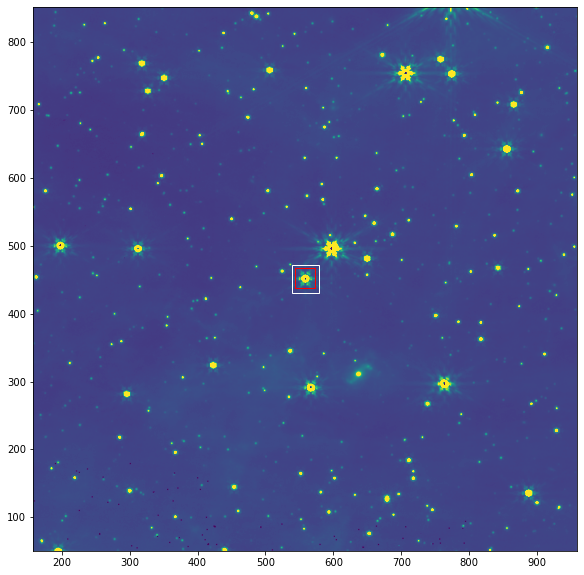

In [537]:
# %matplotlib ipympl

# if i < len(cc_match):
    # print(cc_match.isophotal_vegamag_f444w.iloc[i], cc_match.mag_IR2.iloc[i])
    # print(cc_match.RA.iloc[i], cc_match.DEC.iloc[i])
    # print(cc_match.RAJ2000.iloc[i], cc_match.DEJ2000.iloc[i])

fig, axs = plt.subplots(figsize=(10,10))
axs.imshow(data,vmax=10,origin='lower')
x, y = w_jwst.world_to_pixel(SkyCoord(cc_match.RA.iloc[i], cc_match.DEC.iloc[i],unit='deg'))
box = patches.Rectangle((x-20, y-20), 40, 40, linewidth=1, edgecolor='w', facecolor='none')
axs.add_patch(box)
x_s, y_s = w_jwst.world_to_pixel(SkyCoord(cc_match.RAJ2000.iloc[i], cc_match.DEJ2000.iloc[i],unit='deg'))
box_s = patches.Rectangle((x_s-15, y_s-15), 30, 30, linewidth=1, edgecolor='r', facecolor='none')
axs.add_patch(box_s)
box_set = 400
axs.set_xlim(x-box_set,x+box_set)
axs.set_ylim(y-box_set,y+box_set)

print(i)
    # i +=1

    # axs[1].imshow(hdu_spitz[0].data, vmin=1,vmax=8,origin='lower')

    # x, y = w.world_to_pixel(SkyCoord(cc_match.RAJ2000.iloc[i], cc_match.DEJ2000.iloc[i],unit='deg'))
    # x2, y2 = w.world_to_pixel(SkyCoord(cc_match.RA.iloc[i], cc_match.DEC.iloc[i],unit='deg'))
    # box = patches.Rectangle((x-5, y-5), 10, 10, linewidth=1, edgecolor='w', facecolor='none')
    # axs[1].add_patch(box)
    # box2 = patches.Rectangle((x2-5, y2-5), 10, 10, linewidth=1, edgecolor='w', facecolor='none')
    # axs[1].add_patch(box2)
    # # box_set = 800
    # axs[1].set_xlim(min_x,max_x)
    # axs[1].set_ylim(min_y-200,max_y+200)

In [579]:
cc_match = pd.read_csv('CC_Catalog_Feb172023_SPICY_Preds.csv')
cc_match.set_index(cc_match['Unnamed: 0'],inplace=True)
subset = cc_match.loc[[38,45,52,85,111,118,125,169,206,263,271,283,291,353,366,368,397]]
# print(len(cc_match))

webb_raw = pd.read_csv('CC_Catalog_Feb172023.csv')

In [580]:
cc_match.loc[418]

Unnamed: 0                                  418
RA                                   159.194032
DEC                                  -58.634867
isophotal_vegamag_f200w               18.722216
isophotal_vegamag_err_f200w            0.001656
isophotal_vegamag_f090w                     NaN
isophotal_vegamag_err_f090w                 NaN
isophotal_vegamag_f187n                     NaN
isophotal_vegamag_err_f187n                 NaN
isophotal_vegamag_f335m               17.701757
isophotal_vegamag_err_f335m            0.002094
isophotal_vegamag_f444w                14.25278
isophotal_vegamag_err_f444w            0.000346
isophotal_vegamag_f444w-f470n          13.09576
isophotal_vegamag_err_f444w-f470n      0.000824
isophotal_vegamag_f770w                     NaN
isophotal_vegamag_err_f770w                 NaN
isophotal_vegamag_f1130w                    NaN
isophotal_vegamag_err_f1130w                NaN
isophotal_vegamag_f1280w                    NaN
isophotal_vegamag_err_f1280w            

In [581]:
def find_closest(ra,dec, webb_dat, tol=0.01):
    mask = np.sqrt((webb_dat.RA - ra)**2 + (webb_dat.DEC - dec)**2) < tol
    return webb_dat[mask]

    

52
3


Set DATE-AVG to '2022-06-03T12:45:26.346' from MJD-AVG.
Set DATE-END to '2022-06-03T15:22:38.772' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.653673 from OBSGEO-[XYZ].
Set OBSGEO-H to 1655651690.924 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


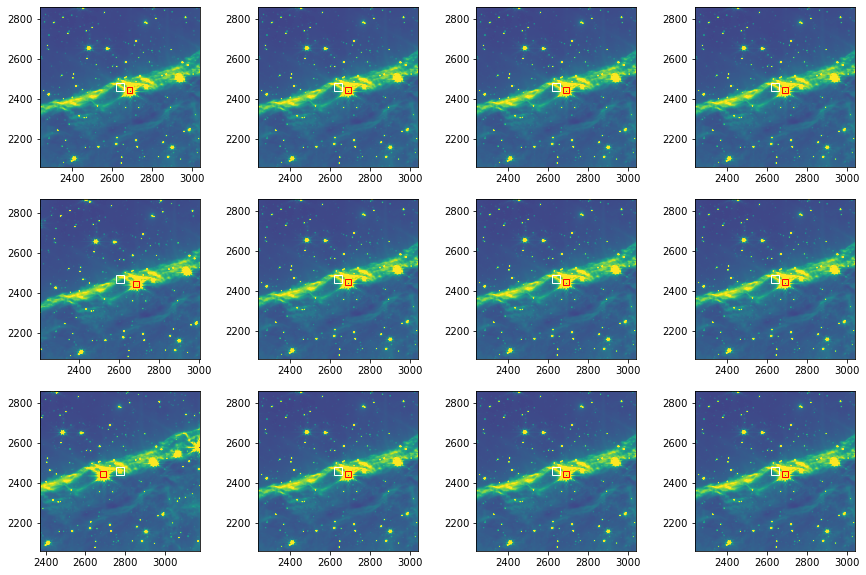

In [627]:
i =2
print(subset.index[i])

filt = 'f444w'
infile = imagefiles[filt]
hdu = fits.open(infile)
data = hdu[1].data
imwcs = wcs.WCS(hdu[1].header, hdu)

x_s, y_s = w_jwst.world_to_pixel(SkyCoord(subset.RAJ2000.iloc[i], subset.DEJ2000.iloc[i],unit='deg'))
box_set = 400

# Find all objects close to Spitzer object and save in new dataframe
match_pot = find_closest(subset.RAJ2000.iloc[i],subset.DEJ2000.iloc[i],webb_raw,tol=0.002)
print(len(match_pot))
# print(subset.RAJ2000.iloc[i])
# print(match_pot.RA.iloc[i])

l = 0 
fig, axs = plt.subplots(3,4,figsize=(15,10))
for j in [0,1,2,3]:
    for k in [0,1,2]:
        if l < len(match_pot):
            x, y = w_jwst.world_to_pixel(SkyCoord(match_pot.RA.iloc[l], match_pot.DEC.iloc[l],unit='deg'))
        else:
            x, y = w_jwst.world_to_pixel(SkyCoord(subset.RA.iloc[i], subset.DEC.iloc[i],unit='deg'))
        # Plot image
        axs[k][j].imshow(data,vmax=10,origin='lower')

        # Plot boxes on top of image
        # x, y = w_jwst.world_to_pixel(SkyCoord(match_pot.RA.iloc[l], match_pot.DEC.iloc[l],unit='deg'))
        box = patches.Rectangle((x-20, y-20), 40, 40, linewidth=1, edgecolor='w', facecolor='none')
        box_s = patches.Rectangle((x_s-15, y_s-15), 30, 30, linewidth=1, edgecolor='r', facecolor='none')
        axs[k][j].add_patch(box)
        axs[k][j].add_patch(box_s)
        axs[k][j].set_xlim(x-box_set,x+box_set)
        axs[k][j].set_ylim(y-box_set,y+box_set)
        l += 1

# print(i)

nan nan 9.318


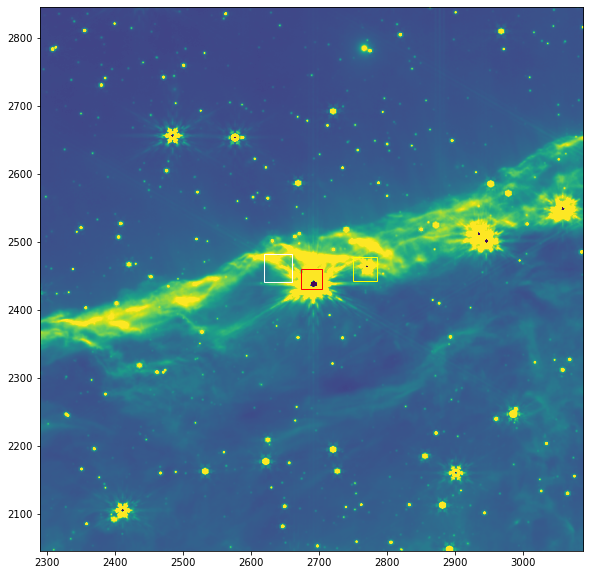

In [629]:
n=2
fig, axs = plt.subplots(figsize=(10,10))
axs.imshow(data,vmax=10,origin='lower')
x_og, y_og = w_jwst.world_to_pixel(SkyCoord(subset.RA.iloc[i], subset.DEC.iloc[i],unit='deg'))
box = patches.Rectangle((x-20, y-20), 40, 40, linewidth=1, edgecolor='w', facecolor='none')
axs.add_patch(box)
x_new, y_new = w_jwst.world_to_pixel(SkyCoord(match_pot.RA.iloc[n], match_pot.DEC.iloc[n],unit='deg'))
box_n = patches.Rectangle((x_new-20, y_new-20), 35, 35, linewidth=1, edgecolor='yellow', facecolor='none')
axs.add_patch(box_n)
x_s, y_s = w_jwst.world_to_pixel(SkyCoord(cc_match.RAJ2000.loc[subset.index[i]], cc_match.DEJ2000.loc[subset.index[i]],unit='deg'))
box_s = patches.Rectangle((x_s-15, y_s-15), 30, 30, linewidth=1, edgecolor='r', facecolor='none')
axs.add_patch(box_s)
box_set = 400
axs.set_xlim(x_s-box_set,x_s+box_set)
axs.set_ylim(y_s-box_set,y_s+box_set)

print(subset.isophotal_vegamag_f444w.iloc[i],match_pot.isophotal_vegamag_f444w.iloc[n],subset.mag_IR2.iloc[i])

In [598]:
# cc_match[['RA', 'DEC', 'isophotal_vegamag_f200w',
#        'isophotal_vegamag_err_f200w', 'isophotal_vegamag_f090w',
#        'isophotal_vegamag_err_f090w', 'isophotal_vegamag_f187n',
#        'isophotal_vegamag_err_f187n', 'isophotal_vegamag_f335m',
#        'isophotal_vegamag_err_f335m', 'isophotal_vegamag_f444w',
#        'isophotal_vegamag_err_f444w', 'isophotal_vegamag_f444w-f470n',
#        'isophotal_vegamag_err_f444w-f470n', 'isophotal_vegamag_f770w',
#        'isophotal_vegamag_err_f770w', 'isophotal_vegamag_f1130w',
#        'isophotal_vegamag_err_f1130w', 'isophotal_vegamag_f1280w',
#        'isophotal_vegamag_err_f1280w', 'isophotal_vegamag_f1800w',
#        'isophotal_vegamag_err_f1800w']].loc[subset.index[i]] = match_pot[['RA', 'DEC', 'isophotal_vegamag_f200w',
#        'isophotal_vegamag_err_f200w', 'isophotal_vegamag_f090w',
#        'isophotal_vegamag_err_f090w', 'isophotal_vegamag_f187n',
#        'isophotal_vegamag_err_f187n', 'isophotal_vegamag_f335m',
#        'isophotal_vegamag_err_f335m', 'isophotal_vegamag_f444w',
#        'isophotal_vegamag_err_f444w', 'isophotal_vegamag_f444w-f470n',
#        'isophotal_vegamag_err_f444w-f470n', 'isophotal_vegamag_f770w',
#        'isophotal_vegamag_err_f770w', 'isophotal_vegamag_f1130w',
#        'isophotal_vegamag_err_f1130w', 'isophotal_vegamag_f1280w',
#        'isophotal_vegamag_err_f1280w', 'isophotal_vegamag_f1800w',
#        'isophotal_vegamag_err_f1800w']].iloc[n]

/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_57501/424316568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_match[['RA', 'DEC', 'isophotal_vegamag_f200w',
